In [1]:
import tensorflow as tf
print("Versão do TensorFlow:", tf.__version__)

from tensorflow import keras
print("versão do Keras:", keras.__version__)

# IMPORTANDO COMANDOS E FUNÇÕES #

import numpy as np
import h5py
import matplotlib.pyplot as plt #gerar gráfico
import os
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping

from sklearn.metrics import classification_report, confusion_matrix, balanced_accuracy_score, accuracy_score

import pickle

# IMPORTANDO LAYERS PARA A CNN #

from keras.models import Sequential
from keras import layers
from keras.layers import Dropout

Versão do TensorFlow: 2.5.0
versão do Keras: 2.5.0


Matplotlib is building the font cache; this may take a moment.


In [2]:
# MONTANDO A ESTRUTURA DA CNN #

model = Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(Dropout(0.5)) # dropout de 50%
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(Dropout(0.5))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(Dropout(0.5))

model.add(layers.Flatten()) # camada de achatamento
model.add(layers.Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(layers.Dense(units = 11, activation = 'softmax')) # 11 unidades de saída (11 classes)

In [3]:
print("versao do h5py:", h5py.__version__)

versao do h5py: 3.1.0


In [4]:
model.summary() # resumo da estrutura, com os parâmetros ajustáveis

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 64)        3

In [5]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(
                  from_logits=False,
                  label_smoothing=0,                            #configurações da função loss
                  reduction="auto",
                  name="categorical_crossentropy"),
              metrics=['accuracy'])

In [6]:
from functions_extras import criar_treino_teste

In [7]:
criar_treino_teste('./dataset_fruits/', 0.25)

Criando particionamento
	 492 	+ 164 	= 656 	 -> Apple Granny Smith
	 492 	+ 164 	= 656 	 -> Apple Red 2
	 466 	+ 156 	= 622 	 -> Kiwi
	 492 	+ 164 	= 656 	 -> Limes
	 492 	+ 164 	= 656 	 -> Nectarine
	 438 	+ 146 	= 584 	 -> Onion White
	 492 	+ 164 	= 656 	 -> Peach Flat
	 492 	+ 164 	= 656 	 -> Pear Williams
	 421 	+ 141 	= 562 	 -> Plum 2
	 450 	+ 150 	= 600 	 -> Potato White
	 474 	+ 158 	= 632 	 -> Watermelon
Particionamento criado com sucesso!


In [8]:
# DIVIDIR AS IMAGENS EM PARTIÇÃO DE TREINO E VALIDAÇÃO, UTILIZANDO O IMAGEDATAGENERATOR #

datagen =  ImageDataGenerator(rescale = 1./255, validation_split=0.35) # comando para reescala

# imagens de treino (65%) 

train_data = datagen.flow_from_directory('dataset_fruits/train',
                                         subset='training',
                                         batch_size = 64,
                                         target_size = (100, 100)) # definindo tamanho das imagens

# imagens de validação (35%)

valid_data = datagen.flow_from_directory('dataset_fruits/train',
                                         subset='validation',
                                         batch_size = 64,
                                         target_size = (100, 100))

Found 3384 images belonging to 11 classes.
Found 1817 images belonging to 11 classes.


In [9]:
# DEFININDO O COMANDO EARLYSTOPPING #

es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience = 13) #early stopping baseado na melhor acurácia de validação

In [10]:
# INÍCIO DO TREINO DO MODELO #

history = model.fit(train_data,
                    epochs=100,
                    validation_data=valid_data,
                    callbacks = [es],
                    verbose=True)

# informação: steps_per_epoch = número de imagens / batch_size

Epoch 1/100
53/53 [==============================] - 49s 649ms/step - loss: 2.3724 - accuracy: 0.1199 - val_loss: 1.8688 - val_accuracy: 0.3996
Epoch 2/100
53/53 [==============================] - 35s 658ms/step - loss: 1.5135 - accuracy: 0.4174 - val_loss: 0.9614 - val_accuracy: 0.7270
Epoch 3/100
53/53 [==============================] - 36s 673ms/step - loss: 0.9442 - accuracy: 0.6202 - val_loss: 0.7863 - val_accuracy: 0.7182
Epoch 4/100
53/53 [==============================] - 36s 686ms/step - loss: 0.8574 - accuracy: 0.6671 - val_loss: 0.6544 - val_accuracy: 0.8167
Epoch 5/100
53/53 [==============================] - 36s 683ms/step - loss: 0.7312 - accuracy: 0.7125 - val_loss: 0.5093 - val_accuracy: 0.8844
Epoch 6/100
53/53 [==============================] - 37s 706ms/step - loss: 0.5431 - accuracy: 0.7910 - val_loss: 0.5145 - val_accuracy: 0.8646
Epoch 7/100
53/53 [==============================] - 36s 682ms/step - loss: 0.5363 - accuracy: 0.7900 - val_loss: 0.5611 - val_accuracy:

53/53 [==============================] - 34s 636ms/step - loss: 0.1625 - accuracy: 0.9393 - val_loss: 0.2857 - val_accuracy: 0.9703
Epoch 58/100
53/53 [==============================] - 35s 661ms/step - loss: 0.1399 - accuracy: 0.9437 - val_loss: 0.6702 - val_accuracy: 0.9615
Epoch 59/100
53/53 [==============================] - 35s 661ms/step - loss: 0.1629 - accuracy: 0.9352 - val_loss: 0.4279 - val_accuracy: 0.9642
Epoch 60/100
53/53 [==============================] - 34s 637ms/step - loss: 0.1649 - accuracy: 0.9347 - val_loss: 0.2561 - val_accuracy: 0.9703
Epoch 00060: early stopping


In [11]:
model.save('model.h5',
          overwrite = True) 
del model

with open('trainHistoryDict_model', 'wb') as file_pi:
        pickle.dump(history.history, file_pi)

In [12]:
model = keras.models.load_model('model.h5')
history = pickle.load(open('trainHistoryDict_model', "rb"))

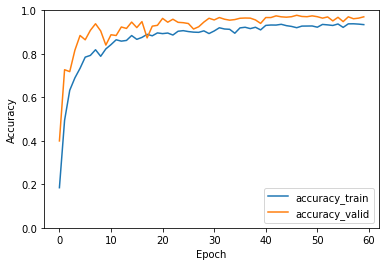

In [13]:
# GERANDO GRÁFICO COM RESULTADOS DAS ACURÁCIAS DE TREINO E VALIDAÇÃO #

plt.plot(history['accuracy'], label='accuracy_train')
plt.plot(history['val_accuracy'], label = 'accuracy_valid')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

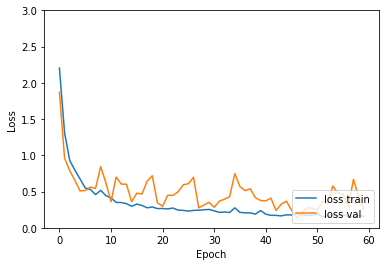

In [14]:
# GERANDO GRÁFICO COM RESULTADOS DO LOSS DE TREINO E VALIDAÇÃO #

plt.plot(history['loss'], label='loss train')
plt.plot(history['val_loss'], label='loss val')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 3])
plt.legend(loc='lower right')

In [15]:
datagen_test =  ImageDataGenerator(rescale = 1./255) # comando para reescala das imagens de teste

# imagens de teste

test_data = datagen_test.flow_from_directory(directory='dataset_fruits/test',
                                             target_size = (100, 100),
                                             batch_size = 1,
                                             shuffle=True)

Found 1735 images belonging to 11 classes.


In [16]:
# DEFININDO COMANDO PARA AVALIAR O DESEMPENHO DO MODELO NAS IMAGENS DE TESTE #

test_loss, test_acc = model.evaluate(test_data)

print("acurácia nos dados de teste:", test_acc)
print("loss dos dados de teste:", test_loss)

1735/1735 [==============================] - 9s 5ms/step - loss: 0.0741 - accuracy: 0.9914
acurácia nos dados de teste: 0.9913544654846191
loss dos dados de teste: 0.07414999604225159


In [17]:
Y_pred = model.predict(test_data)
y_pred = np.argmax(Y_pred, axis=1)

print(y_pred.shape)

print('Accuracy')
print(accuracy_score(test_data.classes,y_pred))

print('Balanced Accuracy')
print(balanced_accuracy_score(test_data.classes,y_pred))

print('Confusion Matrix')
print(confusion_matrix(test_data.classes, y_pred))
print('Classification Report')

(1735,)
Accuracy
0.10259365994236311
Balanced Accuracy
0.1025406884627659
Confusion Matrix
[[18 20 15 12 12 10 13 18 10 25 11]
 [ 7 17 13 20 17 16 19 18 15 14  8]
 [14 13 22 12 22 12  8 17 13  6 17]
 [23 13 18 17 17  9 14 12 13 16 12]
 [16 15  8 11 18 18 12 19  8 18 21]
 [15  8 12 16 18 13 14 10 14 16 10]
 [15 14 14 19 20  9 16 17 11 12 17]
 [14 10  9 16 17 10 24 16 12 14 22]
 [14  9 14 13 12 12 15 13 18 12  9]
 [17 11 20  9 12 21 14  9 13  8 16]
 [11 19 11 19 14 16 15 15 14  9 15]]
Classification Report


# Primeira estratégia: 100% teste

In [18]:
# MONTANDO A ESTRUTURA DA CNN #

model_1est = keras.models.load_model('model.h5')

In [19]:
model_1est.summary() # resumo da estrutura, com os parâmetros ajustáveis

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 64)        3

In [20]:
criar_treino_teste('./dataset_smkt/', 1)

Criando particionamento
	 200 	+ 1 	= 201 	 -> agata_potato
	 210 	+ 1 	= 211 	 -> diamond_peach
	 211 	+ 1 	= 212 	 -> fuji_apple
	 154 	+ 1 	= 155 	 -> granny_smith_apple
	 170 	+ 1 	= 171 	 -> kiwi
	 246 	+ 1 	= 247 	 -> nectarine
	 74 	+ 1 	= 75 	 -> onion
	 263 	+ 1 	= 264 	 -> plum
	 158 	+ 1 	= 159 	 -> spanish_pear
	 105 	+ 1 	= 106 	 -> taiti_lime
	 191 	+ 1 	= 192 	 -> watermelon
Particionamento criado com sucesso!


In [21]:
# DIVIDIR AS IMAGENS EM PARTIÇÃO DE TREINO E VALIDAÇÃO, UTILIZANDO O IMAGEDATAGENERATOR #

datagen =  ImageDataGenerator(rescale = 1./255) # comando para reescala

# imagens de teste (100%) 

test_data = datagen.flow_from_directory('dataset_smkt/train', 
                                         batch_size = 1,
                                         target_size = (100, 100),
                                         shuffle=True) # definindo tamanho das imagens

Found 1982 images belonging to 11 classes.


In [22]:
# DEFININDO COMANDO PARA AVALIAR O DESEMPENHO DO MODELO NAS IMAGENS DE TESTE #

test_loss, test_acc = model_1est.evaluate(test_data)

print("acurácia nos dados de teste:", test_acc)
print("loss dos dados de teste:", test_loss)

1982/1982 [==============================] - 25s 13ms/step - loss: 15.6641 - accuracy: 0.0424
acurácia nos dados de teste: 0.04238143190741539
loss dos dados de teste: 15.664131164550781


In [23]:
Y_pred = model_1est.predict(test_data)
y_pred = np.argmax(Y_pred, axis=1)

print(y_pred.shape)

print('Accuracy')
print(accuracy_score(test_data.classes,y_pred))

print('Balanced Accuracy')
print(balanced_accuracy_score(test_data.classes,y_pred))

print('Confusion Matrix')
print(confusion_matrix(test_data.classes, y_pred))
print('Classification Report')

(1982,)
Accuracy
0.11251261352169525
Balanced Accuracy
0.09667517884053128
Confusion Matrix
[[  8   0   4   4   0  14  21  92   0   8  49]
 [  7   0   3   6   0  11  13  90   0   9  71]
 [  9   1   7   2   1  14  15  82   0   8  72]
 [  8   0   2   6   0   9   5  65   0  11  48]
 [ 12   0   6   7   0   4  11  65   0   7  58]
 [ 10   2   6   6   0  11  15  86   0  16  94]
 [  5   1   0   0   0   6   5  34   0   4  19]
 [  9   2   3  12   1  15  16 115   0  10  80]
 [  7   0   3   1   0   6   9  76   0   4  52]
 [  4   1   6   4   0   4   4  36   0   7  39]
 [  6   0   1   5   0   3  14  86   0  12  64]]
Classification Report


# Segunda estratégia: 50% treino 50% teste

In [24]:
# Criando modelo

model = keras.models.load_model('model.h5')

In [25]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(
                  from_logits=False,
                  label_smoothing=0,                            #configurações da função loss
                  reduction="auto",
                  name="categorical_crossentropy"),
              metrics=['accuracy'])

In [26]:
criar_treino_teste('./dataset_smkt/', 0.5)

Criando particionamento
	 100 	+ 101 	= 201 	 -> agata_potato
	 105 	+ 106 	= 211 	 -> diamond_peach
	 106 	+ 106 	= 212 	 -> fuji_apple
	 77 	+ 78 	= 155 	 -> granny_smith_apple
	 85 	+ 86 	= 171 	 -> kiwi
	 123 	+ 124 	= 247 	 -> nectarine
	 37 	+ 38 	= 75 	 -> onion
	 132 	+ 132 	= 264 	 -> plum
	 79 	+ 80 	= 159 	 -> spanish_pear
	 53 	+ 53 	= 106 	 -> taiti_lime
	 96 	+ 96 	= 192 	 -> watermelon
Particionamento criado com sucesso!


In [27]:
# DIVIDIR AS IMAGENS EM PARTIÇÃO DE TREINO E VALIDAÇÃO, UTILIZANDO O IMAGEDATAGENERATOR #

datagen =  ImageDataGenerator(rescale = 1./255, validation_split=0.2) # comando para reescala + divisão em 20% para validação

# imagens de treino (80%) 

train_data = datagen.flow_from_directory('dataset_smkt/train', 
                                         subset = 'training',
                                         batch_size = 64,
                                         target_size = (100, 100)) # definindo tamanho das imagens

# imagens de validação (20%)

valid_data = datagen.flow_from_directory('dataset_smkt/train',
                                         subset = 'validation',
                                         batch_size = 64,
                                         target_size = (100, 100))

Found 798 images belonging to 11 classes.
Found 195 images belonging to 11 classes.


In [28]:
# INÍCIO DO TREINO DO MODELO #

history = model.fit(train_data,
                    epochs=100,
                    validation_data=valid_data,
                    callbacks = [es],
                    verbose=True)

# informação: steps_per_epoch = número de imagens / batch_size

Epoch 1/100
13/13 [==============================] - 17s 1s/step - loss: 8.2607 - accuracy: 0.0664 - val_loss: 2.4958 - val_accuracy: 0.1538
Epoch 2/100
13/13 [==============================] - 15s 1s/step - loss: 2.5538 - accuracy: 0.0827 - val_loss: 2.3193 - val_accuracy: 0.1487
Epoch 3/100
13/13 [==============================] - 15s 1s/step - loss: 2.2831 - accuracy: 0.1504 - val_loss: 2.2100 - val_accuracy: 0.2667
Epoch 4/100
13/13 [==============================] - 15s 1s/step - loss: 2.1270 - accuracy: 0.2343 - val_loss: 2.1052 - val_accuracy: 0.2513
Epoch 5/100
13/13 [==============================] - 15s 1s/step - loss: 1.9378 - accuracy: 0.2957 - val_loss: 1.9815 - val_accuracy: 0.3026
Epoch 6/100
13/13 [==============================] - 15s 1s/step - loss: 1.8287 - accuracy: 0.3271 - val_loss: 1.8544 - val_accuracy: 0.3641
Epoch 7/100
13/13 [==============================] - 15s 1s/step - loss: 1.6547 - accuracy: 0.3747 - val_loss: 1.7600 - val_accuracy: 0.4615
Epoch 8/100
1

Epoch 59/100
13/13 [==============================] - 16s 1s/step - loss: 0.2595 - accuracy: 0.8872 - val_loss: 1.4097 - val_accuracy: 0.6308
Epoch 60/100
13/13 [==============================] - 15s 1s/step - loss: 0.2983 - accuracy: 0.8947 - val_loss: 1.6990 - val_accuracy: 0.6564
Epoch 61/100
13/13 [==============================] - 15s 1s/step - loss: 0.2496 - accuracy: 0.8997 - val_loss: 1.4551 - val_accuracy: 0.6718
Epoch 62/100
13/13 [==============================] - 15s 1s/step - loss: 0.2352 - accuracy: 0.9198 - val_loss: 1.7263 - val_accuracy: 0.6564
Epoch 63/100
13/13 [==============================] - 15s 1s/step - loss: 0.2195 - accuracy: 0.9123 - val_loss: 1.9582 - val_accuracy: 0.6205
Epoch 64/100
13/13 [==============================] - 15s 1s/step - loss: 0.2778 - accuracy: 0.8997 - val_loss: 1.6056 - val_accuracy: 0.7026
Epoch 65/100
13/13 [==============================] - 15s 1s/step - loss: 0.2754 - accuracy: 0.8985 - val_loss: 1.3522 - val_accuracy: 0.6462
Epoch 

In [29]:
model.save('model_2est.h5',
          overwrite = True) 
del model

with open('trainHistoryDict_model_2est', 'wb') as file_pi:
        pickle.dump(history.history, file_pi)

In [30]:
model_2est = keras.models.load_model('model_2est.h5')
history = pickle.load(open('trainHistoryDict_model_2est', "rb"))

In [31]:
model_2est.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 64)        3

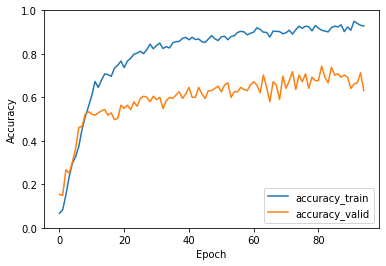

In [32]:
# GERANDO GRÁFICO COM RESULTADOS DAS ACURÁCIAS DE TREINO E VALIDAÇÃO #

plt.plot(history['accuracy'], label='accuracy_train')
plt.plot(history['val_accuracy'], label = 'accuracy_valid')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

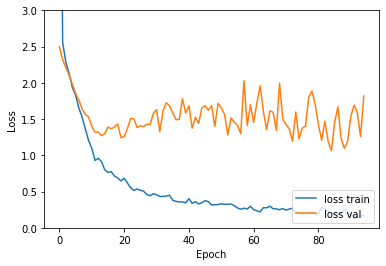

In [33]:
# GERANDO GRÁFICO COM RESULTADOS DO LOSS DE TREINO E VALIDAÇÃO #

plt.plot(history['loss'], label='loss train')
plt.plot(history['val_loss'], label='loss val')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 3])
plt.legend(loc='lower right')

In [34]:
datagen_test =  ImageDataGenerator(rescale = 1./255) # comando para reescala das imagens de teste

# imagens de teste

test_data = datagen_test.flow_from_directory(directory='dataset_smkt/test',
                                             target_size = (100, 100),
                                             batch_size = 1,
                                             shuffle=True)

Found 1000 images belonging to 11 classes.


In [35]:
# DEFININDO COMANDO PARA AVALIAR O DESEMPENHO DO MODELO NAS IMAGENS DE TESTE #

test_loss, test_acc = model_2est.evaluate(test_data) # verificar versão do Keras

print("acurácia nos dados de teste:", test_acc)
print("loss dos dados de teste:", test_loss)

1000/1000 [==============================] - 13s 13ms/step - loss: 0.7093 - accuracy: 0.8180
acurácia nos dados de teste: 0.8180000185966492
loss dos dados de teste: 0.7092776298522949


In [36]:
Y_pred = model_2est.predict(test_data)
y_pred = np.argmax(Y_pred, axis=1)

print(y_pred.shape)

print('Accuracy')
print(accuracy_score(test_data.classes,y_pred))

print('Balanced Accuracy')
print(balanced_accuracy_score(test_data.classes,y_pred))

print('Confusion Matrix')
print(confusion_matrix(test_data.classes, y_pred))
print('Classification Report')

(1000,)
Accuracy
0.124
Balanced Accuracy
0.11263875561273262
Confusion Matrix
[[ 7  3  5  5  7 27  4 11 14  9  9]
 [ 8  9  9  9  9 22  5 13  9  5  8]
 [10  2  6  8  9 21  8 18 10  6  8]
 [ 9  1  5  8  2 21  5 10  9  1  7]
 [11  4  9  8  3 13  2 14 10  4  8]
 [ 7 10  7  6 12 29  3  9 19 10 12]
 [ 0  2  1  5  1 11  2  4  4  2  6]
 [17  3  8 11  4 28  4 28 16  5  8]
 [ 3  6  4  3  6 19  2  7 12  5 13]
 [ 7  3  6  3  2 15  0  5  3  4  5]
 [ 9  1  9  6  3 20  3 14 13  2 16]]
Classification Report


# Terceira estratégia: 70% treino e 30% teste

In [37]:
# Criando modelo

model = keras.models.load_model('model.h5')

In [38]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(
                  from_logits=False,
                  label_smoothing=0,                            #configurações da função loss
                  reduction="auto",
                  name="categorical_crossentropy"),
              metrics=['accuracy'])

In [39]:
criar_treino_teste('./dataset_smkt/', 0.3)

Criando particionamento
	 140 	+ 61 	= 201 	 -> agata_potato
	 147 	+ 64 	= 211 	 -> diamond_peach
	 148 	+ 64 	= 212 	 -> fuji_apple
	 108 	+ 47 	= 155 	 -> granny_smith_apple
	 119 	+ 52 	= 171 	 -> kiwi
	 172 	+ 75 	= 247 	 -> nectarine
	 52 	+ 23 	= 75 	 -> onion
	 184 	+ 80 	= 264 	 -> plum
	 111 	+ 48 	= 159 	 -> spanish_pear
	 74 	+ 32 	= 106 	 -> taiti_lime
	 134 	+ 58 	= 192 	 -> watermelon
Particionamento criado com sucesso!


In [40]:
# DIVIDIR AS IMAGENS EM PARTIÇÃO DE TREINO E VALIDAÇÃO, UTILIZANDO O IMAGEDATAGENERATOR #

datagen =  ImageDataGenerator(rescale = 1./255, validation_split=0.2) # comando para reescala + divisão em 20% para validação

# imagens de treino (80%) 

train_data = datagen.flow_from_directory('dataset_smkt/train', 
                                         subset = 'training',
                                         batch_size = 64,
                                         target_size = (100, 100)) # definindo tamanho das imagens

# imagens de validação (20%)

valid_data = datagen.flow_from_directory('dataset_smkt/train',
                                         subset='validation',
                                         batch_size = 64,
                                         target_size = (100, 100))

Found 1117 images belonging to 11 classes.
Found 272 images belonging to 11 classes.


In [41]:
# INÍCIO DO TREINO DO MODELO #

history = model.fit(train_data,
                    epochs=100,
                    validation_data=valid_data,
                    callbacks = [es])

# informação: steps_per_epoch = número de imagens / batch_size

Epoch 1/100
18/18 [==============================] - 24s 1s/step - loss: 7.0981 - accuracy: 0.0797 - val_loss: 2.3372 - val_accuracy: 0.1471
Epoch 2/100
18/18 [==============================] - 21s 1s/step - loss: 2.3232 - accuracy: 0.1235 - val_loss: 2.1403 - val_accuracy: 0.1985
Epoch 3/100
18/18 [==============================] - 21s 1s/step - loss: 2.0644 - accuracy: 0.2614 - val_loss: 2.0068 - val_accuracy: 0.3456
Epoch 4/100
18/18 [==============================] - 21s 1s/step - loss: 1.7549 - accuracy: 0.3796 - val_loss: 1.7990 - val_accuracy: 0.4301
Epoch 5/100
18/18 [==============================] - 21s 1s/step - loss: 1.5977 - accuracy: 0.4279 - val_loss: 1.6612 - val_accuracy: 0.4706
Epoch 6/100
18/18 [==============================] - 21s 1s/step - loss: 1.4136 - accuracy: 0.4727 - val_loss: 1.5460 - val_accuracy: 0.5074
Epoch 7/100
18/18 [==============================] - 21s 1s/step - loss: 1.2857 - accuracy: 0.5219 - val_loss: 1.4425 - val_accuracy: 0.5000
Epoch 8/100
1

In [42]:
model.save('model_3est.h5',
          overwrite = True) 
del model

with open('trainHistoryDict_model_3est', 'wb') as file_pi:
        pickle.dump(history.history, file_pi)

In [43]:
model_3est = keras.models.load_model('model_3est.h5')
history = pickle.load(open('trainHistoryDict_model_3est', "rb"))

In [44]:
model_3est.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 64)        3

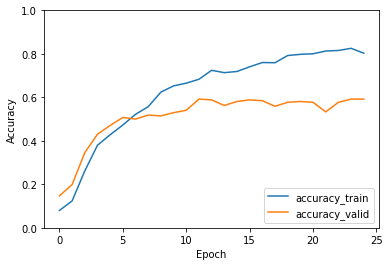

In [45]:
# GERANDO GRÁFICO COM RESULTADOS DAS ACURÁCIAS DE TREINO E VALIDAÇÃO #

plt.plot(history['accuracy'], label='accuracy_train')
plt.plot(history['val_accuracy'], label = 'accuracy_valid')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

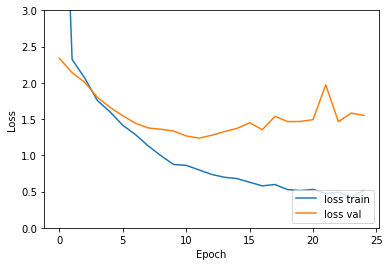

In [46]:
# GERANDO GRÁFICO COM RESULTADOS DO LOSS DE TREINO E VALIDAÇÃO #

plt.plot(history['loss'], label='loss train')
plt.plot(history['val_loss'], label='loss val')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 3])
plt.legend(loc='lower right')

In [47]:
datagen_test =  ImageDataGenerator(rescale = 1./255) # comando para reescala das imagens de teste

# imagens de teste

test_data = datagen_test.flow_from_directory(directory='dataset_smkt/test',
                                             target_size = (100, 100),
                                             batch_size = 1,
                                             shuffle=True)

Found 604 images belonging to 11 classes.


In [48]:
# DEFININDO COMANDO PARA AVALIAR O DESEMPENHO DO MODELO NAS IMAGENS DE TESTE #

test_loss, test_acc = model_3est.evaluate(test_data) # verificar versão do Keras

print("acurácia nos dados de teste:", test_acc)
print("loss dos dados de teste:", test_loss)

604/604 [==============================] - 8s 12ms/step - loss: 0.4857 - accuracy: 0.8609
acurácia nos dados de teste: 0.860927164554596
loss dos dados de teste: 0.48573610186576843


In [49]:
Y_pred = model_3est.predict(test_data)
y_pred = np.argmax(Y_pred, axis=1)

print(y_pred.shape)

print('Accuracy')
print(accuracy_score(test_data.classes,y_pred))

print('Balanced Accuracy')
print(balanced_accuracy_score(test_data.classes,y_pred))

print('Confusion Matrix')
print(confusion_matrix(test_data.classes, y_pred))
print('Classification Report')

(604,)
Accuracy
0.10596026490066225
Balanced Accuracy
0.09785496482905845
Confusion Matrix
[[ 7 10  8  2  2  6  3 12  5  2  4]
 [10  7 10  4  5  7  1 11  4  0  5]
 [ 1  8  5  7  7  8  4  7  2  4 11]
 [ 4  5  7  4  3  6  1  6  5  2  4]
 [ 5  0  7  6  3  9  2  7  4  4  5]
 [ 3  9 11  5  4  7  3 11  9  6  7]
 [ 2  4  4  0  1  1  1  0  4  4  2]
 [ 7  7 10  3  8  5  2 16  7  4 11]
 [ 3  3 10  3  2  4  4  6  7  2  4]
 [ 2  1  4  4  1  7  1  2  4  2  4]
 [ 7 10 12  5  3  5  0  6  3  2  5]]
Classification Report


# Quarta estratégia: 80% treino e 20% teste

In [50]:
# Criando modelo

model = keras.models.load_model('model.h5')

In [51]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(
                  from_logits=False,
                  label_smoothing=0,                            #configurações da função loss
                  reduction="auto",
                  name="categorical_crossentropy"),
              metrics=['accuracy'])

In [52]:
criar_treino_teste('./dataset_smkt/', 0.2)

Criando particionamento
	 160 	+ 41 	= 201 	 -> agata_potato
	 168 	+ 43 	= 211 	 -> diamond_peach
	 169 	+ 43 	= 212 	 -> fuji_apple
	 124 	+ 31 	= 155 	 -> granny_smith_apple
	 136 	+ 35 	= 171 	 -> kiwi
	 197 	+ 50 	= 247 	 -> nectarine
	 60 	+ 15 	= 75 	 -> onion
	 211 	+ 53 	= 264 	 -> plum
	 127 	+ 32 	= 159 	 -> spanish_pear
	 84 	+ 22 	= 106 	 -> taiti_lime
	 153 	+ 39 	= 192 	 -> watermelon
Particionamento criado com sucesso!


In [53]:
# DIVIDIR AS IMAGENS EM PARTIÇÃO DE TREINO E VALIDAÇÃO, UTILIZANDO O IMAGEDATAGENERATOR #

datagen =  ImageDataGenerator(rescale = 1./255, validation_split=0.2) # comando para reescala + divisão em 20% para validação

# imagens de treino (80%) 

train_data = datagen.flow_from_directory('dataset_smkt/train', 
                                         subset = 'training',
                                         batch_size = 64,
                                         target_size = (100, 100)) # definindo tamanho das imagens

# imagens de validação (20%)

valid_data = datagen.flow_from_directory('dataset_smkt/train',
                                         subset='validation',
                                         batch_size = 64,
                                         target_size = (100, 100))

Found 1276 images belonging to 11 classes.
Found 313 images belonging to 11 classes.


In [54]:
# INÍCIO DO TREINO DO MODELO #

history = model.fit(train_data,
                    epochs=100,
                    validation_data=valid_data,
                    callbacks = [es])

# informação: steps_per_epoch = número de imagens / batch_size

Epoch 1/100
20/20 [==============================] - 27s 1s/step - loss: 6.4321 - accuracy: 0.0737 - val_loss: 2.3329 - val_accuracy: 0.1182
Epoch 2/100
20/20 [==============================] - 24s 1s/step - loss: 2.2295 - accuracy: 0.1560 - val_loss: 2.0984 - val_accuracy: 0.3099
Epoch 3/100
20/20 [==============================] - 24s 1s/step - loss: 1.9826 - accuracy: 0.2798 - val_loss: 1.9407 - val_accuracy: 0.3930
Epoch 4/100
20/20 [==============================] - 24s 1s/step - loss: 1.7037 - accuracy: 0.4020 - val_loss: 1.6778 - val_accuracy: 0.4952
Epoch 5/100
20/20 [==============================] - 24s 1s/step - loss: 1.5155 - accuracy: 0.4232 - val_loss: 1.5553 - val_accuracy: 0.5431
Epoch 6/100
20/20 [==============================] - 24s 1s/step - loss: 1.2700 - accuracy: 0.5039 - val_loss: 1.4122 - val_accuracy: 0.5399
Epoch 7/100
20/20 [==============================] - 24s 1s/step - loss: 1.1521 - accuracy: 0.5627 - val_loss: 1.3020 - val_accuracy: 0.5495
Epoch 8/100
2

Epoch 00058: early stopping


In [55]:
model.save('model_4est.h5',
          overwrite = True) 
del model

with open('trainHistoryDict_model_4est', 'wb') as file_pi:
        pickle.dump(history.history, file_pi)

In [56]:
model_4est = keras.models.load_model('model_4est.h5')
history = pickle.load(open('trainHistoryDict_model_4est', "rb"))

In [57]:
model_4est.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 64)        3

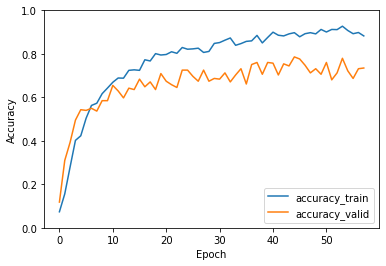

In [58]:
# GERANDO GRÁFICO COM RESULTADOS DAS ACURÁCIAS DE TREINO E VALIDAÇÃO #

plt.plot(history['accuracy'], label='accuracy_train')
plt.plot(history['val_accuracy'], label = 'accuracy_valid')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

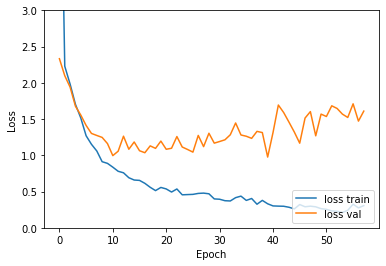

In [59]:
# GERANDO GRÁFICO COM RESULTADOS DO LOSS DE TREINO E VALIDAÇÃO #

plt.plot(history['loss'], label='loss train')
plt.plot(history['val_loss'], label='loss val')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 3])
plt.legend(loc='lower right')

In [60]:
datagen_test =  ImageDataGenerator(rescale = 1./255) # comando para reescala das imagens de teste

# imagens de teste

test_data = datagen_test.flow_from_directory(directory='dataset_smkt/test',
                                             target_size = (100, 100),
                                             batch_size = 1,
                                             shuffle=True)

Found 404 images belonging to 11 classes.


In [61]:
# DEFININDO COMANDO PARA AVALIAR O DESEMPENHO DO MODELO NAS IMAGENS DE TESTE #

test_loss, test_acc = model_4est.evaluate(test_data) # verificar versão do Keras

print("acurácia nos dados de teste:", test_acc)
print("loss dos dados de teste:", test_loss)

404/404 [==============================] - 5s 13ms/step - loss: 0.3535 - accuracy: 0.9332
acurácia nos dados de teste: 0.9331682920455933
loss dos dados de teste: 0.35351690649986267


In [62]:
Y_pred = model_4est.predict(test_data)
y_pred = np.argmax(Y_pred, axis=1)

print(y_pred.shape)

print('Accuracy')
print(accuracy_score(test_data.classes,y_pred))

print('Balanced Accuracy')
print(balanced_accuracy_score(test_data.classes,y_pred))

print('Confusion Matrix')
print(confusion_matrix(test_data.classes, y_pred))
print('Classification Report')

(404,)
Accuracy
0.11386138613861387
Balanced Accuracy
0.10985907827809066
Confusion Matrix
[[5 3 7 2 3 3 1 6 4 3 4]
 [4 6 3 5 4 2 0 7 6 3 3]
 [2 3 7 7 1 8 2 4 5 0 4]
 [3 3 4 2 3 8 0 4 2 0 2]
 [3 3 4 1 2 7 2 5 3 2 3]
 [5 5 5 2 6 8 3 7 3 2 4]
 [0 2 1 1 0 1 2 2 1 2 3]
 [4 6 7 2 4 6 0 6 6 4 8]
 [3 5 3 3 4 3 1 3 2 1 4]
 [2 3 0 0 0 7 0 3 3 2 2]
 [3 5 4 4 1 2 3 6 4 3 4]]
Classification Report
